# Загрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st

In [2]:
kickstarter = pd.read_csv('kickstarter.csv') 

In [3]:
kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        378661 non-null  int64  
 1   ID                378661 non-null  int64  
 2   name              378657 non-null  object 
 3   category          378661 non-null  object 
 4   main_category     378661 non-null  object 
 5   currency          359728 non-null  object 
 6   deadline          378661 non-null  object 
 7   goal              378661 non-null  float64
 8   launched          378661 non-null  object 
 9   pledged           378661 non-null  float64
 10  state             378661 non-null  object 
 11  backers           378472 non-null  float64
 12  country           378661 non-null  object 
 13  usd pledged       374864 non-null  float64
 14  usd_pledged_real  378661 non-null  float64
 15  usd_goal_real     378661 non-null  float64
 16  Unnamed           37

In [4]:
kickstarter.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Unnamed
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,0.0,1533.95,1000002330
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15.0,US,100.0,2421.0,30000.00,1000003930
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,NaN,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,220.0,45000.00,1000004038
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,1.0,5000.00,1000007540
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0,1283.0,19500.00,1000011046


- `Country` - страна проекта
- `Currency` - валюта проекта
- `ID` - идентификатор проекта
- `Launched` - дата и время регистрации проекта
- `Main Category` - основная категория проекта
- `State` - статус проекта
- `Backers` - количество спонсоров проекта
- `Goal` - сколько нужно собрать проекту, финансовая цель
- `Pledged` - собрано, в лоцальной валюте
- `Usd Pledged` - собрано в доллара США

In [5]:
 kickstarter = kickstarter.drop(columns=['ID','Unnamed: 0','Unnamed','usd_pledged_real','usd_goal_real'])

In [6]:
 kickstarter.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged'],
      dtype='object')

In [13]:
kickstarter.isna().sum()

index                0
name                 0
category             0
main_category        0
currency         18762
deadline             0
goal                 0
launched             0
pledged              0
state                0
backers              0
country              0
usd pledged          0
year                 0
month                0
dayofweek            0
day                  0
hour                 0
duration             0
dtype: int64

In [8]:
kickstarter.dropna(subset=['name'],inplace=True)
kickstarter.dropna(subset=['backers'],inplace=True)
kickstarter.dropna(subset=['usd pledged'],inplace=True)

In [9]:
kickstarter['launched'] = pd.to_datetime(kickstarter['launched'])
kickstarter['deadline'] = pd.to_datetime(kickstarter['deadline'])

In [10]:
kickstarter['year'] = kickstarter['launched'].dt.year
kickstarter['month'] = kickstarter['launched'].dt.month
kickstarter['dayofweek'] = kickstarter['launched'].dt.dayofweek
kickstarter['day'] = kickstarter['launched'].dt.day
kickstarter['hour'] = kickstarter['launched'].dt.hour

In [11]:
kickstarter['duration'] = (kickstarter['deadline']-kickstarter['launched']).dt.days

In [12]:
kickstarter.reset_index(inplace=True)

In [15]:
for i,j in zip([1,2,3],[2,3,5]):
  print(i,j)

1 2
2 3
3 5


In [16]:
zip([1,2,3],[2,3,5])


In [17]:
dct = dict(zip(kickstarter['country'],kickstarter['currency']))

In [18]:
dct

{'AT': 'EUR',
 'AU': 'AUD',
 'BE': 'EUR',
 'CA': 'CAD',
 'CH': 'CHF',
 'DE': 'EUR',
 'DK': 'DKK',
 'ES': 'EUR',
 'FR': 'EUR',
 'GB': 'GBP',
 'HK': 'HKD',
 'IE': 'EUR',
 'IT': 'EUR',
 'JP': 'JPY',
 'LU': 'EUR',
 'MX': 'MXN',
 'NL': 'EUR',
 'NO': 'NOK',
 'NZ': 'NZD',
 'SE': 'SEK',
 'SG': 'SGD',
 'US': 'USD'}

In [19]:
list_of_index = kickstarter[kickstarter['currency'].isna()].index

In [20]:
list_of_index

Int64Index([     2,     18,     40,     53,     69,     72,     88,     89,
               111,    168,
            ...
            374486, 374489, 374493, 374542, 374543, 374572, 374635, 374643,
            374659, 374670],
           dtype='int64', length=18762)

In [21]:
kickstarter.iloc[list_of_index]

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year,month,dayofweek,day,hour,duration
2,2,Where is Hank?,Narrative Film,Film & Video,NaN,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3.0,US,220.00,2013,1,5,12,0,44
18,18,Mike Corey's Darkness & Light Album,Music,Music,NaN,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7.0,US,250.00,2012,8,3,2,14,14
40,40,Unschooling To University Book Project,Nonfiction,Publishing,NaN,2018-01-19,3000.0,2017-11-20 18:15:14,592.00,live,24.0,CA,185.65,2017,11,0,20,18,59
53,53,A Teacher's Travels in China,Photography,Photography,NaN,2012-05-13,4000.0,2012-04-18 23:34:56,4866.17,successful,71.0,US,4866.17,2012,4,2,18,23,24
69,69,"""Flying"" Carpets from Azerbaijan, Iran and Tur...",Weaving,Crafts,NaN,2015-04-29,5000.0,2015-03-30 19:55:31,2.00,failed,1.0,GB,2.98,2015,3,0,30,19,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374572,378558,"A new venture, needs a new wheel.",Printing,Crafts,NaN,2017-08-13,2000.0,2017-07-13 07:49:29,2916.00,successful,60.0,GB,2237.56,2017,7,3,13,7,30
374635,378623,BETTER DESPERATE,Music Videos,Film & Video,NaN,2016-05-07,300.0,2016-04-07 20:04:26,300.00,successful,5.0,US,300.00,2016,4,3,7,20,29
374643,378631,MONSTROCARDS- A Creative Drawing Game of Horri...,Playing Cards,Games,NaN,2014-10-03,10000.0,2014-09-03 19:53:50,13861.50,successful,413.0,US,13861.50,2014,9,2,3,19,29
374659,378647,The Cease is Increase,Nonfiction,Publishing,NaN,2012-09-14,4999.0,2012-08-15 17:11:00,980.00,failed,16.0,US,980.00,2012,8,2,15,17,29


In [22]:
kickstarter['currency'] = kickstarter.apply(lambda x: dct[x['country']] if pd.isna(x['currency']) else x['currency'],axis=1 )

In [23]:
kickstarter.iloc[list_of_index]

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year,month,dayofweek,day,hour,duration
2,2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3.0,US,220.00,2013,1,5,12,0,44
18,18,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7.0,US,250.00,2012,8,3,2,14,14
40,40,Unschooling To University Book Project,Nonfiction,Publishing,CAD,2018-01-19,3000.0,2017-11-20 18:15:14,592.00,live,24.0,CA,185.65,2017,11,0,20,18,59
53,53,A Teacher's Travels in China,Photography,Photography,USD,2012-05-13,4000.0,2012-04-18 23:34:56,4866.17,successful,71.0,US,4866.17,2012,4,2,18,23,24
69,69,"""Flying"" Carpets from Azerbaijan, Iran and Tur...",Weaving,Crafts,GBP,2015-04-29,5000.0,2015-03-30 19:55:31,2.00,failed,1.0,GB,2.98,2015,3,0,30,19,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374572,378558,"A new venture, needs a new wheel.",Printing,Crafts,GBP,2017-08-13,2000.0,2017-07-13 07:49:29,2916.00,successful,60.0,GB,2237.56,2017,7,3,13,7,30
374635,378623,BETTER DESPERATE,Music Videos,Film & Video,USD,2016-05-07,300.0,2016-04-07 20:04:26,300.00,successful,5.0,US,300.00,2016,4,3,7,20,29
374643,378631,MONSTROCARDS- A Creative Drawing Game of Horri...,Playing Cards,Games,USD,2014-10-03,10000.0,2014-09-03 19:53:50,13861.50,successful,413.0,US,13861.50,2014,9,2,3,19,29
374659,378647,The Cease is Increase,Nonfiction,Publishing,USD,2012-09-14,4999.0,2012-08-15 17:11:00,980.00,failed,16.0,US,980.00,2012,8,2,15,17,29


In [24]:
kickstarter.isna().sum()

index            0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
year             0
month            0
dayofweek        0
day              0
hour             0
duration         0
dtype: int64

# Описательные статистики

In [25]:
kickstarter['usd pledged'].describe()

count    3.746730e+05
mean     7.038690e+03
std      7.865954e+04
min      0.000000e+00
25%      1.698000e+01
50%      3.948700e+02
75%      3.034740e+03
max      2.033899e+07
Name: usd pledged, dtype: float64

## Среднее

<img src='https://img.my-excel.ru/formula-v-jeksel-srednee-arifmeticheskoe_5_1.png'>

In [27]:
kickstarter['usd pledged'].mean()

7038.69039367669

## Медиана

<img src='https://m-learn.ru/wp-content/uploads/2018/06/fig_3-1024x511.png'>

In [28]:
kickstarter['usd pledged'].median()


394.87

## Мода

<img src='https://statanaliz.info/wp-content/uploads/2015/01/moda_04.png'>

In [29]:
kickstarter['usd pledged'].mode()

0    0.0
dtype: float64

In [33]:
kickstarter.query('state=="successful"')

,index,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,year,month,dayofweek,day,hour,duration
5,5,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224.0,US,52375.00,2016,2,4,26,13,34
6,6,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16.0,US,1205.00,2014,12,0,1,18,19
11,11,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100.0,US,12700.00,2013,3,5,9,6,29
14,14,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761.0,GB,57763.78,2017,4,2,5,19,27
18,18,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7.0,US,250.00,2012,8,3,2,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374654,378642,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Tabletop Games,Games,EUR,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,successful,35.0,FR,66.72,2017,10,2,4,11,26
374656,378644,The Manual Bar Blade,Product Design,Design,USD,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,successful,120.0,US,6169.00,2015,11,0,23,7,21
374658,378646,The Dog Coffee Book,Children's Books,Publishing,USD,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,successful,31.0,US,1732.02,2013,10,4,18,21,42
374663,378651,AT THE BEACH,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,successful,78.0,CA,5019.92,2014,2,3,20,1,29


In [35]:
kickstarter.query('state=="successful"')['usd pledged'].min()

0.0

## Дисперсия и стандартное отклонение

<img src='https://smart-lab.ru/uploads/images/00/00/16/2012/09/16/4fe58b.png'>

In [36]:
np.var(kickstarter['usd pledged'])

6187307453.343897

<img src='https://smart-lab.ru/uploads/images/00/00/16/2012/09/16/7273a8.png'>

In [37]:
np.var(kickstarter['usd pledged'], ddof=1)

6187323967.274624

<img src='https://img.my-excel.ru/mod-funkcija-v-excel_8_1.png'>

In [38]:
np.var(kickstarter['usd pledged'], ddof=1)**0.5

78659.54466734869

In [39]:
kickstarter['usd pledged'].std()

78659.54466734869

## Квантили

In [40]:
kickstarter['goal'].describe()

count    3.746730e+05
mean     4.952767e+04
std      1.189651e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.500000e+03
75%      1.650000e+04
max      1.000000e+08
Name: goal, dtype: float64

In [41]:
kickstarter['goal'].min()

0.01

In [43]:
kickstarter['goal'].quantile(0.75)

16500.0

# Гистограммы. Распределения

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
ax.hist(np.random.normal(0,1,10000),bins=100)
plt.show()

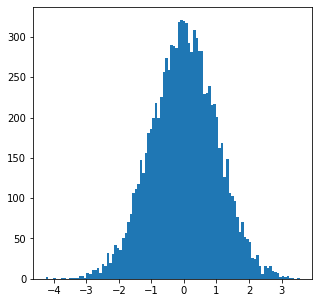

In [49]:
fig,ax = plt.subplots(figsize=(5,5))
ax.hist(np.random.normal(0,1,10000),bins=100)
plt.show()

KeyboardInterrupt: ignored

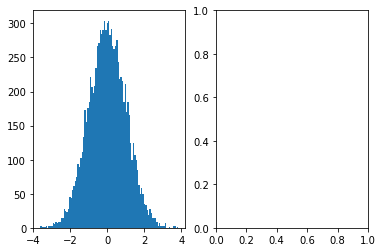

In [54]:
fig,ax = plt.subplots(1,2)
#ax = plt.gca()
ax[0].hist(np.random.normal(0,1,10000),bins=100)
ax[1].hist(np.random.normal(0,10,10000),bins=10000)
plt.show()

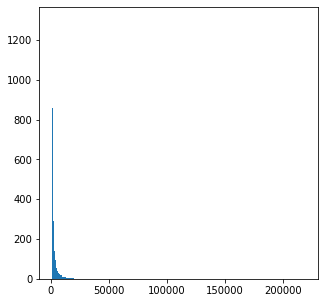

In [57]:
fig,ax = plt.subplots(figsize=(5,5))
ax.hist(kickstarter.query('backers>1000')['backers'], bins=1000)
plt.show()

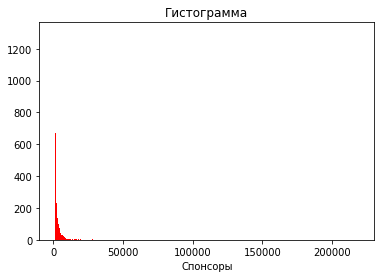

In [60]:
plt.hist( kickstarter.query('backers>1000')['backers'], bins=1000, color='r', )
plt.title('Гистограмма')
plt.xlabel('Спонсоры')
plt.show()

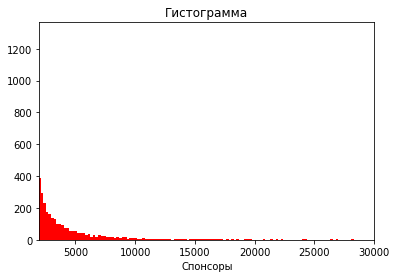

In [61]:
plt.hist( kickstarter.query('backers>1000')['backers'], bins=1000, color='r', )
plt.title('Гистограмма')
plt.xlabel('Спонсоры')
plt.xlim((2000,30000))
plt.show()

## Центральная предельная теорема

In [62]:
# rate parameter for the exponentially distributed population
rate = 0.25

#Population mean
mu = 1/rate

# Population standard deviation
sd = np.sqrt(1/(rate**2))

print('Population mean:', mu)
print('Population standard deviation:', sd)

Population mean: 4.0
Population standard deviation: 4.0


In [63]:
sample_size = 2
df2 = pd.DataFrame(index= ['x1', 'x2'] )

for i in range(1, 51):
    exponential_sample = np.random.exponential((1/rate), sample_size)
    col = f'sample {i}'
    df2[col] = exponential_sample

# Taking a peek at the samples
df2

,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,sample 10,sample 11,sample 12,sample 13,sample 14,sample 15,sample 16,sample 17,sample 18,sample 19,sample 20,sample 21,sample 22,sample 23,sample 24,sample 25,sample 26,sample 27,sample 28,sample 29,sample 30,sample 31,sample 32,sample 33,sample 34,sample 35,sample 36,sample 37,sample 38,sample 39,sample 40,sample 41,sample 42,sample 43,sample 44,sample 45,sample 46,sample 47,sample 48,sample 49,sample 50
x1,0.973257,0.181986,2.460675,0.094230,2.394785,5.590509,0.696774,5.112720,8.797977,7.818450,4.564772,0.997269,2.925756,6.593479,9.457384,11.196687,2.590798,7.326232,0.618776,0.568230,8.369300,5.025081,1.604686,8.242536,0.109384,0.008688,4.746676,0.342041,3.994210,1.767879,8.105304,0.077643,2.103260,5.770923,5.134030,2.756942,1.440818,7.220787,0.478794,0.543675,2.281924,0.824650,0.981491,8.618743,0.141208,5.213173,0.651593,1.698299,2.973393,8.371903
x2,1.526427,1.873258,1.469108,3.238209,0.376048,1.534924,1.792780,14.338379,8.105491,0.465879,3.562598,5.220460,1.910072,3.650845,1.318059,2.450193,9.840616,0.412872,2.752626,0.565009,16.328983,3.969510,0.730081,1.114297,0.432076,3.383775,1.591034,13.209725,9.965877,0.665589,1.246381,8.180702,7.582481,0.031195,12.129827,1.925249,5.679058,1.871421,2.127668,1.736589,9.126415,12.698338,1.465381,9.231343,0.328290,8.226913,6.663588,0.148310,1.327345,3.413415


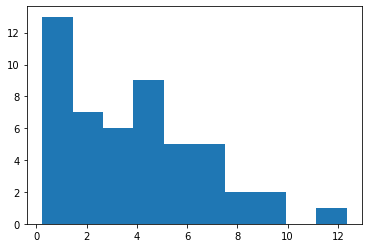

In [64]:
df2_sample_means = df2.mean()
plt.hist(df2_sample_means)
plt.show()

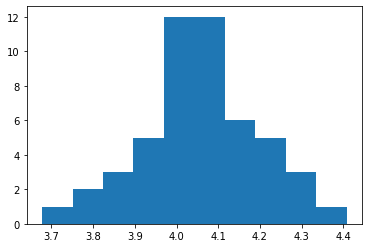

In [65]:
sample_size=500

df500 = pd.DataFrame()

for i in range(1, 51):
    exponential_sample = np.random.exponential((1/rate), sample_size)
    col = f'sample {i}'
    df500[col] = exponential_sample


df500_sample_means = pd.DataFrame(df500.mean(),columns=['Sample means'])
plt.hist(df500_sample_means['Sample means'])
plt.show()

In [ ]:
df500_sample_means

,Sample means
sample 1,4.054453
sample 2,3.761132
sample 3,3.905274
sample 4,3.933050
sample 5,4.093267
sample 6,3.685376
sample 7,4.519135
sample 8,3.970240
sample 9,3.796047
sample 10,3.965066


## Доверительный интервал

In [67]:
confidence_interval = (st.t.interval(0.95,len(kickstarter.query('country=="US"')['backers'])-1,kickstarter.query('country=="US"')['backers'].mean(), 
                                    kickstarter.query('country=="US"')['backers'].sem())
                      )

In [ ]:
kickstarter.query('country=="JP"')['backers'].mean()

48.55

In [68]:
confidence_interval 

(109.53252973868729, 116.67895605706838)

In [ ]:
confidence_interval = [kickstarter.query('country=="JP"')['backers'].quantile(0.025),kickstarter.query('country=="JP"')['backers'].quantile(0.975)]

In [ ]:
confidence_interval

[0.0, 206.5749999999999]

# Анализ выбросов и аномалий. Боксплоты

<img src='https://agricolamz.github.io/2018_FE_R_statistics/Lab_9_files/figure-html/unnamed-chunk-1-1.png'>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png'>

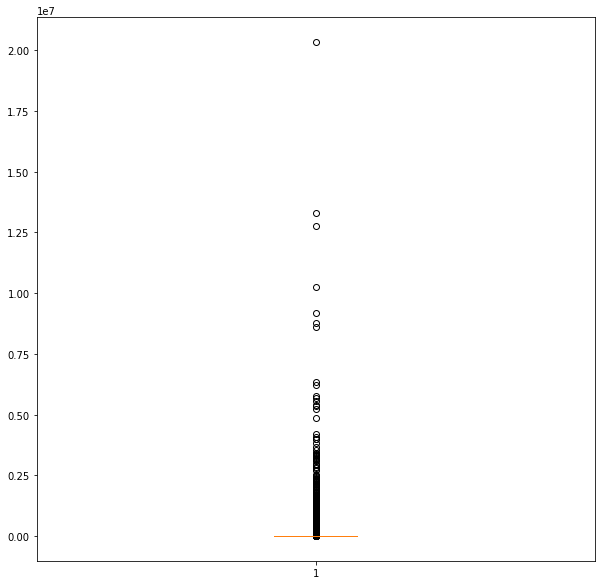

In [69]:
plt.figure(figsize=(10,10))
plt.boxplot(kickstarter['usd pledged'])
plt.show()

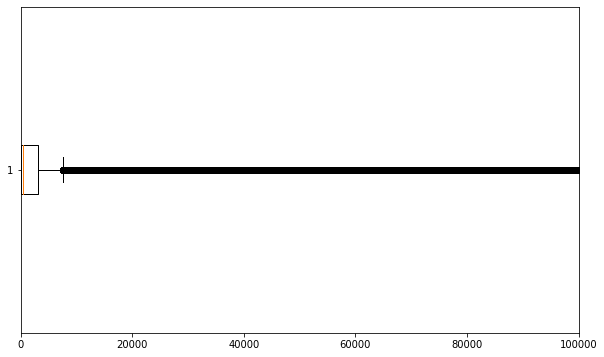

In [77]:
plt.figure(figsize=(10,6))
plt.boxplot(kickstarter['usd pledged'],vert=False)
plt.xlim((0,100000))
plt.show()

In [78]:
def  burst(data, column): # функция расчета границ усов ящика с усами
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    return data[column].quantile(0.25)- iqr*1.5, data[column].quantile(0.75)+ iqr*1.5

In [79]:
wl,wr = burst(kickstarter, 'usd pledged')

In [80]:
wl,wr

(-4509.66, 7561.379999999999)

In [83]:
kickstarter = kickstarter.loc[kickstarter['usd pledged']<=wr]

In [84]:
kickstarter = kickstarter.loc[kickstarter['usd pledged']> 0]

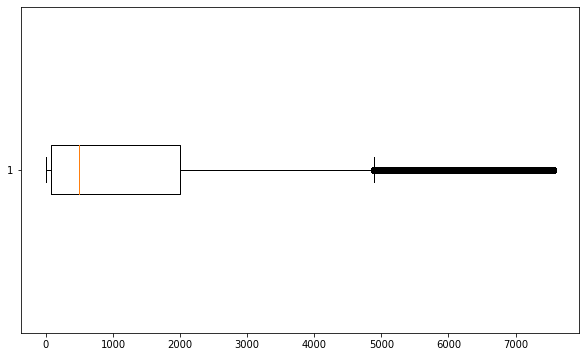

In [85]:
plt.figure(figsize=(10,6))
plt.boxplot(kickstarter['usd pledged'],vert=False)

plt.show()

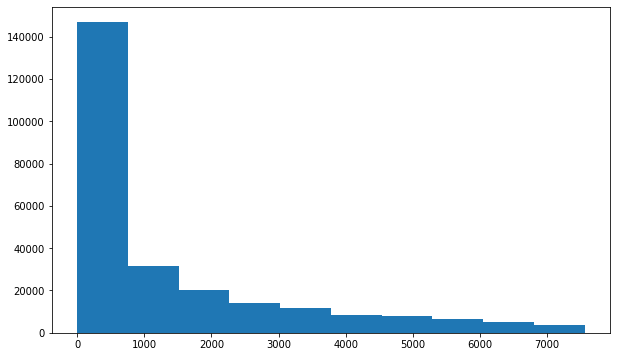

In [86]:
plt.figure(figsize=(10,6))
plt.hist(kickstarter['usd pledged'])

plt.show()

In [87]:
wl,wr = burst(kickstarter, 'backers')

In [88]:
kickstarter = kickstarter.loc[(kickstarter['backers']> 0) & (kickstarter['backers']<=wr)]

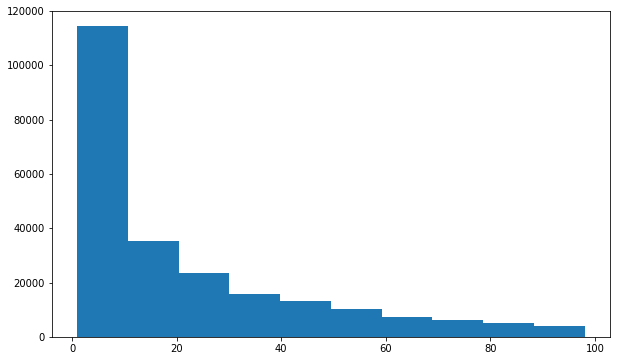

In [89]:
plt.figure(figsize=(10,6))
plt.hist(kickstarter['backers'])

plt.show()

In [90]:
kickstarter.shape


(234788, 19)

# Линейные графики

In [91]:
data = kickstarter.groupby('year')['name'].count().reset_index()

In [92]:
data 

,year,name
0,2009,989
1,2010,7702
2,2011,19244
3,2012,29029
4,2013,30201
5,2014,43972
6,2015,46070
7,2016,31917
8,2017,25585
9,2018,79


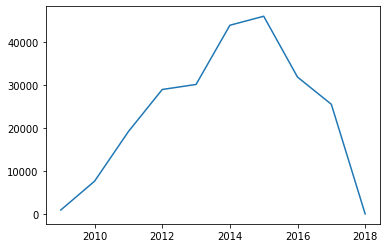

In [93]:
plt.plot(data['year'],data['name'])

# Барплоты

In [95]:
data = kickstarter.groupby('state').agg({'goal':'mean','usd pledged':'mean','name':'count'}).reset_index()

In [96]:
data

,state,goal,usd pledged,name
0,canceled,64762.396216,795.426585,22710
1,failed,52087.144008,657.209083,138110
2,live,31440.270682,496.553230,1511
3,successful,2702.305197,2250.325565,71543
4,suspended,325006.719912,703.355810,914


<BarContainer object of 5 artists>

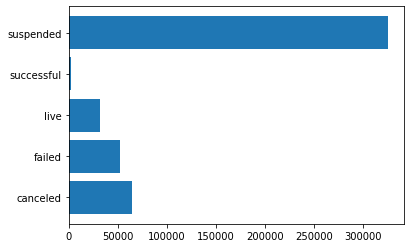

In [102]:
plt.barh(data['state'],data['goal'])

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

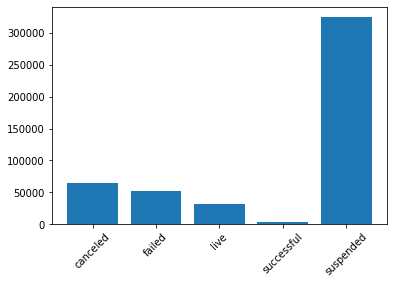

In [104]:
plt.bar(data['state'],data['goal'])
plt.xticks(rotation=45)

<BarContainer object of 5 artists>

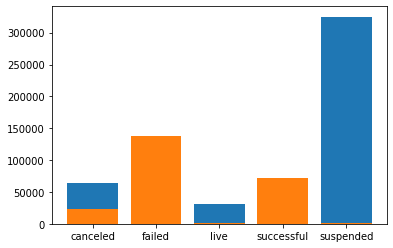

In [107]:
plt.bar(data['state'],data['goal'])
plt.bar(data['state'],data['name'])

In [108]:
data = kickstarter.groupby(['year','country'])['name'].count().reset_index()

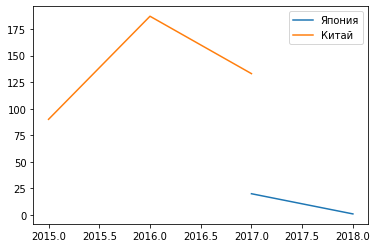

In [112]:
plt.plot(data.query('country=="JP"')['year'],data.query('country=="JP"')['name'])
plt.plot(data.query('country=="CH"')['year'],data.query('country=="CH"')['name'])
plt.legend(labels=['Япония','Китай'])

# Пайчарт

In [114]:
data = kickstarter.groupby('year')['name'].count().reset_index()

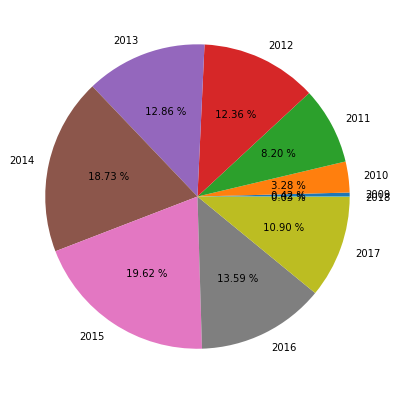

In [115]:
plt.figure(figsize=(7,7))
plt.pie(data['name'],labels=data['year'],autopct = '% 1.2f %% ')
plt.show()

# Скаттерплоты. Корреляция

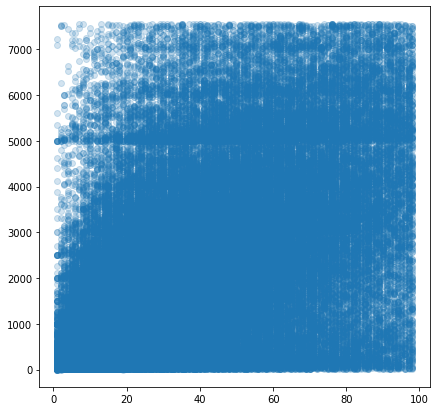

In [120]:
plt.figure(figsize=(7,7))
plt.scatter(kickstarter['backers'],kickstarter['usd pledged'], alpha=0.2)
plt.show()

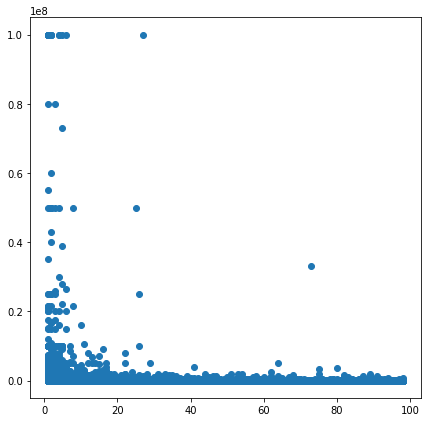

In [121]:
plt.figure(figsize=(7,7))
plt.scatter(kickstarter['backers'],kickstarter['goal'])
plt.show()

<img src='https://gigabaza.ru/images/10/18849/589f89f0.gif'>

<img src='https://statanaliz.info/wp-content/uploads/2019/04/corr1.png'>

In [122]:
kickstarter.corr().style.background_gradient("RdBu_r")

,index,goal,pledged,backers,usd pledged,year,month,dayofweek,day,hour,duration
index,1.000000,0.004214,0.001886,-0.000374,-0.001079,0.001893,-0.000220,0.002814,-0.001133,-0.001098,-0.003305
goal,0.004214,1.000000,0.004357,-0.019142,-0.012499,0.014728,-0.000310,-0.001395,-0.003111,0.002269,0.024479
pledged,0.001886,0.004357,1.000000,0.293486,0.272531,0.059162,0.023819,-0.004521,-0.001685,0.000489,-0.003877
backers,-0.000374,-0.019142,0.293486,1.000000,0.706747,-0.044783,0.016472,-0.010434,-0.015268,0.005604,-0.066906
usd pledged,-0.001079,-0.012499,0.272531,0.706747,1.000000,-0.200821,-0.009729,-0.002332,-0.014473,0.000059,-0.013399
year,0.001893,0.014728,0.059162,-0.044783,-0.200821,1.000000,-0.091849,-0.018560,-0.006501,0.050797,-0.173436
month,-0.000220,-0.000310,0.023819,0.016472,-0.009729,-0.091849,1.000000,-0.014793,-0.033247,0.006033,-0.013169
dayofweek,0.002814,-0.001395,-0.004521,-0.010434,-0.002332,-0.018560,-0.014793,1.000000,0.004448,-0.124140,0.016539
day,-0.001133,-0.003111,-0.001685,-0.015268,-0.014473,-0.006501,-0.033247,0.004448,1.000000,0.002800,-0.003529
hour,-0.001098,0.002269,0.000489,0.005604,0.000059,0.050797,0.006033,-0.124140,0.002800,1.000000,-0.017036


# Проверка гипотез. p-value

In [ ]:
kickstarter['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

## Классика

<img src='https://be5.biz/ekonomika/e008/image/pic_186.jpg'>

(array([228.,  51.,  38.,  39.,  15.,  13.,   4.,  11.,   8.,   3.]),
 array([ 1. , 10.7, 20.4, 30.1, 39.8, 49.5, 59.2, 68.9, 78.6, 88.3, 98. ]),
 <a list of 10 Patch objects>)

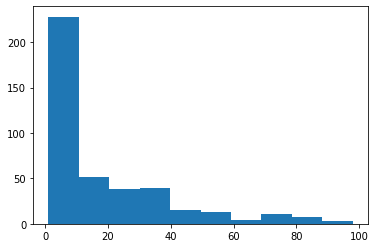

In [124]:
plt.hist(kickstarter.query('country=="CH"')['backers'])

In [126]:
st.shapiro(kickstarter.query('country=="CH"')['backers'])


(0.7773314714431763, 3.1897780029228865e-23)

In [127]:
st.kstest(kickstarter.query('country=="CH"')['backers'], 'norm')

KstestResult(statistic=0.8413447460685429, pvalue=0.0)

In [ ]:
p_value

2.884308735963735e-28

<img src='https://avatars.mds.yandex.net/get-zen_doc/4756594/pub_6053204155586b230c35ff53_60533a299b23db779bb57d6f/scale_2400'>

In [129]:
results = st.mannwhitneyu(kickstarter.query('state=="live"')['backers'],kickstarter.query('state=="failed"')['backers'])

In [130]:
results


MannwhitneyuResult(statistic=79339895.0, pvalue=9.981100538991824e-59)

In [131]:
results = st.ttest_ind(kickstarter.query('country=="US"')['backers'],kickstarter.query('country=="CH"')['backers'])

In [135]:
results = st.ttest_ind(kickstarter.query('country=="JP"')['usd pledged'],kickstarter.query('country=="CH"')['usd pledged'])

In [136]:
results

Ttest_indResult(statistic=-1.5887434794470783, pvalue=0.11285499828264174)

## Бутстреп

In [137]:
A = kickstarter.query('country=="JP"')['usd pledged']
B = kickstarter.query('country=="CH"')['usd pledged']

In [138]:
AB_difference = A.mean() - B.mean() 


alpha = 0.05
    
state = np.random.RandomState(12345)

bootstrap_samples = 1000
count = 0
for i in range(bootstrap_samples):
     
    united_samples = pd.concat([A, B]) 

    # создайте подвыборку
    #subsample = united_samples.sample(frac=1, replace=True,random_state=state)
    # разбейте подвыборку пополам
    subsample_A = A.sample(frac=0.1, replace=True,random_state=state)
    subsample_B = B.sample(frac=0.1, replace=True,random_state=state)

    # найдите разницу средних
    bootstrap_difference = subsample_B.mean() - subsample_A.mean()
    
    # если разница не меньше фактической, увеличиваем счётчик
    if bootstrap_difference >= AB_difference:
        count += 1

# p-value равно доле превышений значений
pvalue = 1. * count / bootstrap_samples
print('p-value =', pvalue)


p-value = 0.999
